In [14]:
import torch
from PIL import Image
from torchvision.transforms import transforms as T
from model import CNNtoRNN
from get_loaders import Flicker_Dataset, MyCollate
from torch import nn
from torch import optim

In [2]:
transformation = T.Compose([
    T.Resize((224,224)),
    # T.CenterCrop((300,300)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_location = "Flicker8k/flickr8k"

dataset  = Flicker_Dataset(
    data_location+ "/images",
    data_location+"/captions.txt",
    transform=transformation,
    freq_threshold=3
)

pad_idx = dataset.vocab.stoi["<PAD>"]


In [4]:
import matplotlib.pyplot as plt
def show_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [16]:
img , cap = dataset[38]
# from torch.utils.tensorboard import SummaryWriter
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters initialization
embed_size = 250
n_layers = 1
hidden_size = 256
vocab_size = len(dataset.vocab)
learning_rate = 0.0001
n_epochs = 2

# initialize the model, and loss function
model = CNNtoRNN(embed_size=embed_size, n_layers=n_layers, vocabulary_size=vocab_size, hidden_size=hidden_size).to(device)
m = torch.load('fourE_3.pth.tar')
model.load_state_dict(m['model'])
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer.load_state_dict(m['optimizer'])
criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi['<PAD>'])

In [17]:



accumulation_steps = 4
running_loss=0

for epoch in range(n_epochs):
    for idx , (img, caption) in enumerate(loader):

        img , caption = img.to(device), caption.to(device)

        output = model(img, caption[:-1])
        
        loss = criterion(output.reshape(-1, output.shape[2]), caption.reshape(-1))
        
        # optimizer.zero_grad()
        loss.backward(loss)
        # optimizer.step()

        if (idx+1) % accumulation_steps == 0:
        # Update the model parameters
            optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (idx+1) % 100 == 0:
            print('[Epoch %d, Batch %5d] loss: %.3f' % (epoch+1, idx+1, running_loss / 100))
            running_loss = 0.0
        else:
            # Don't update the model parameters yet
            optimizer.zero_grad()

    # print(f'Epoch {epoch} Correct Captions: {CAP}')
    # print(f'Epoch {epoch} output: {[dataset.vocab.itos[idx] for idx in model.caption_image(IMAGE, dataset.vocab)]}')
    




NameError: name 'loader' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


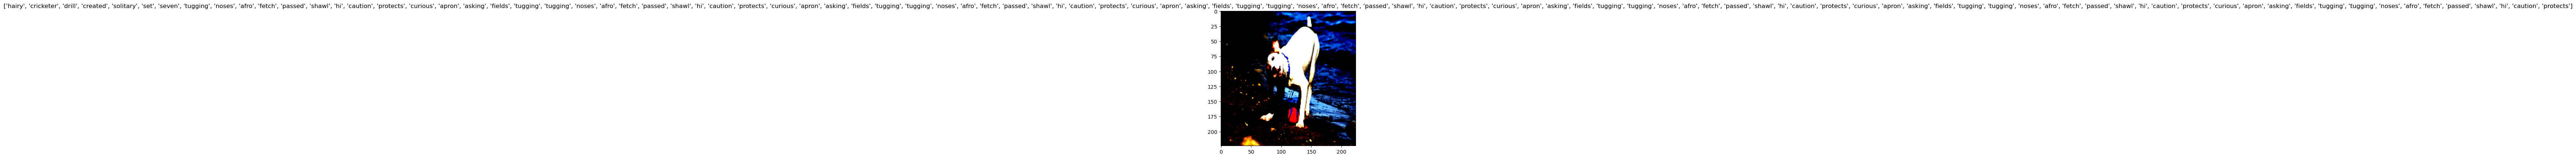

In [12]:

result_caption = []

with torch.no_grad():
    x = img.to(device).unsqueeze(0)
    x = model.CNN_Encoder(x)
    states = None

    for _ in range(100):
        hiddens, states = model.RNN_Decoder.rnn(x, states)

        output = model.RNN_Decoder.linear(hiddens.squeeze(0))
        predicted = output.argmax()
        result_caption.append(predicted.item())
        x = model.RNN_Decoder.embedding(predicted).unsqueeze(0)

        if dataset.vocab.itos[predicted.item()] == "<EOS>":
            break
[dataset.vocab.itos[idx] for idx in result_caption]
show_image(img, [dataset.vocab.itos[idx] for idx in result_caption])

In [20]:
import pytorch_lightning

In [4]:
from time import time
import multiprocessing as mp
import torch 
from torch import optim
from torchvision.transforms import transforms as T
from torch import nn  
import model
from model import CNNtoRNN
from get_loaders import Flicker_Dataset, MyCollate
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import numpy as np

transformation = T.Compose([
    T.Resize((224,224)),
    # T.CenterCrop((300,300)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_location = "Flicker8k/flickr8k"

dataset  = Flicker_Dataset(
    data_location+ "/images",
    data_location+"/captions.txt",
    transform=transformation,
    freq_threshold=3
)

pad_idx = dataset.vocab.stoi["<PAD>"]




for num_workers in range(2, mp.cpu_count(), 2):  
    train_loader = DataLoader(dataset=dataset,
        batch_size=16,
        shuffle=True,
        pin_memory=True,
        collate_fn=MyCollate(pad_idx),
        num_workers=num_workers)
    start = time()
    for epoch in range(1, 3):
        for i, data in enumerate(train_loader, 0):
            pass
    end = time()
    print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

Finish with:501.6048069000244 second, num_workers=2
Finish with:346.54005694389343 second, num_workers=4
Finish with:295.28358459472656 second, num_workers=6


In [6]:
train_loader = DataLoader(dataset=dataset,
        batch_size=16,
        shuffle=True,
        pin_memory=True,
        collate_fn=MyCollate(pad_idx))
start = time()
for epoch in range(1, 3):
    for i, data in enumerate(train_loader, 0):
        pass                                                        
end = time()
print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

Finish with:693.9649291038513 second, num_workers=6
